In [88]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.tree import DecisionTreeClassifier
import graphviz
from random import * 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_val_predict
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [89]:
data = pd.read_csv("../classificador/Saidas/features_random_forest.csv")
df_test_assalto = pd.read_csv("../classificador/Saidas/features_random_forest_invasao.csv")

data["Fim de Semana"] = data["Fim de Semana"].astype(int)
df_test_assalto["Fim de Semana"] = df_test_assalto["Fim de Semana"].astype(int)

data['Horario'] = pd.to_datetime(data['Horario'])
data['Horario'] = (data['Horario'] - pd.Timestamp(dt.datetime.now().strftime("%Y-%m-%d"))).dt.total_seconds()

df_test_assalto['Horario'] = pd.to_datetime(df_test_assalto['Horario'])
df_test_assalto['Horario'] = (df_test_assalto['Horario'] - pd.Timestamp(dt.datetime.now().strftime("%Y-%m-%d"))).dt.total_seconds()

data.drop(data.columns[0:2], axis=1,inplace=True)
data.drop(data.columns[2], axis=1,inplace=True)
data.drop(data.columns[7], axis=1,inplace=True)

df_test_assalto.drop(df_test_assalto.columns[0:2], axis=1,inplace=True)
df_test_assalto.drop(df_test_assalto.columns[2], axis=1,inplace=True)
df_test_assalto.drop(df_test_assalto.columns[7], axis=1,inplace=True)

print(data.columns)

df_test_assalto

Index(['Horario', 'Fim de Semana', 'Comodo', 'lig_desl_luz',
       'lig_desl_aparelho', 'tempo_lig_luz', 'tempo_lig_aparelho',
       'Atividade'],
      dtype='object')


,Horario,Fim de Semana,Comodo,lig_desl_luz,lig_desl_aparelho,tempo_lig_luz,tempo_lig_aparelho,Atividade
0,660.0,0,Cozinha,0,0,1.000000,0.0,Pres cozinha
1,660.0,0,Sala,0,0,1.000000,1.0,Assistir TV
2,660.0,0,Banho,0,0,1.000000,0.0,Banho aceso
3,660.0,0,Quarto 2,0,0,0.000000,0.0,Pres quarto 2
4,660.0,0,Quarto 3,1,0,0.153846,0.0,Pres quarto 3
...,...,...,...,...,...,...,...,...
353,82440.0,0,Sala,0,0,0.000000,0.0,Pres sala
354,83040.0,0,Cozinha,0,0,1.000000,0.0,Pres cozinha
355,83040.0,0,Sala,0,0,0.000000,0.0,Pres sala
356,83040.0,0,Lavanderia,0,0,1.000000,0.0,Pres lavanderia


In [90]:
data_2 = data.select_dtypes(include=[object])
data_2_assalto = df_test_assalto.select_dtypes(include=[object])
data_2_assalto

,Comodo,Atividade
0,Cozinha,Pres cozinha
1,Sala,Assistir TV
2,Banho,Banho aceso
3,Quarto 2,Pres quarto 2
4,Quarto 3,Pres quarto 3
...,...,...
353,Sala,Pres sala
354,Cozinha,Pres cozinha
355,Sala,Pres sala
356,Lavanderia,Pres lavanderia


In [91]:
data_3 = data.select_dtypes(exclude=[object])
data_3_assalto = df_test_assalto.select_dtypes(exclude=[object])
data_3_assalto

,Horario,Fim de Semana,lig_desl_luz,lig_desl_aparelho,tempo_lig_luz,tempo_lig_aparelho
0,660.0,0,0,0,1.000000,0.0
1,660.0,0,0,0,1.000000,1.0
2,660.0,0,0,0,1.000000,0.0
3,660.0,0,0,0,0.000000,0.0
4,660.0,0,1,0,0.153846,0.0
...,...,...,...,...,...,...
353,82440.0,0,0,0,0.000000,0.0
354,83040.0,0,0,0,1.000000,0.0
355,83040.0,0,0,0,0.000000,0.0
356,83040.0,0,0,0,1.000000,0.0


In [92]:
#Codificação OneHot

data_cmd = pd.Categorical(data_2['Comodo'])
df_dum_cmd = pd.get_dummies(data_cmd, prefix='cmd')

data_cmd_assalto = pd.Categorical(data_2_assalto['Comodo'])
df_dum_cmd_assalto = pd.get_dummies(data_cmd_assalto, prefix='cmd')

data_atv = pd.Categorical(data_2['Atividade'])
df_dum_atv = pd.get_dummies(data_atv, prefix='atv')

data_atv_assalto = pd.Categorical(data_2_assalto['Atividade'])
df_dum_atv_assalto = pd.get_dummies(data_atv_assalto, prefix='atv')

#df_dum = pd.concat([df_dum_per,df_dum_cmd,df_dum_atv], 'columns')
df_dum = pd.concat([df_dum_cmd, df_dum_atv], 'columns')
df_dum

df_dum_assalto = pd.concat([df_dum_cmd_assalto, df_dum_atv_assalto], 'columns')
df_dum_assalto

,cmd_Banho,cmd_Corredor,cmd_Cozinha,cmd_Garagem,cmd_Lavanderia,cmd_Quarto 2,cmd_Quarto 3,cmd_Sala,atv_Assistir TV,atv_Banho aceso,...,atv_Indo dormir,atv_Lavar roupa,atv_Pres corredor,atv_Pres cozinha,atv_Pres garagem,atv_Pres lavanderia,atv_Pres quarto 2,atv_Pres quarto 3,atv_Pres sala,atv_Saida
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
354,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
355,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
356,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [127]:
#Junção de features com codificação OneHot
df_completo = pd.concat([data_3, df_dum], 'columns')
df_completo_assalto = pd.concat([data_3_assalto, df_dum_assalto], 'columns')

zero_list = [0] * len(df_completo_assalto.index)
df_completo_assalto['atv_Acordar (fds)'] = zero_list
df_completo_assalto['atv_Acordar (dia util)'] = zero_list

data_test_27_05 = df_completo.copy()

df_completo.drop(df_completo.index[3003:],inplace=True)
data_test_27_05.drop(data_test_27_05.index[:3003],inplace=True)

df_completo

,Horario,Fim de Semana,lig_desl_luz,lig_desl_aparelho,tempo_lig_luz,tempo_lig_aparelho,cmd_Corredor,cmd_Cozinha,cmd_Sala,atv_Acordar (dia util),atv_Acordar (fds),atv_Indo dormir,atv_Pres cozinha,atv_Pres sala
0,48480.0,1,0,0,1.0,0.0,0,1,0,0,0,0,1,0
1,48480.0,1,0,0,1.0,0.0,0,0,1,0,0,0,0,1
2,48840.0,1,0,0,1.0,0.0,0,1,0,0,0,0,1,0
3,48840.0,1,0,0,1.0,0.0,0,0,1,0,0,0,0,1
4,49440.0,1,0,0,1.0,0.0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,82860.0,1,0,0,1.0,0.0,0,1,0,0,0,0,1,0
2999,83100.0,1,0,0,1.0,0.0,0,1,0,0,0,0,1,0
3000,85140.0,1,0,0,0.0,0.0,0,1,0,0,0,0,1,0
3001,85920.0,1,0,0,1.0,0.0,0,1,0,0,0,0,1,0


In [128]:
data_test_27_05

,Horario,Fim de Semana,lig_desl_luz,lig_desl_aparelho,tempo_lig_luz,tempo_lig_aparelho,cmd_Corredor,cmd_Cozinha,cmd_Sala,atv_Acordar (dia util),atv_Acordar (fds),atv_Indo dormir,atv_Pres cozinha,atv_Pres sala
3003,1440.0,0,0,0,1.0,0.0,0,1,0,0,0,0,1,0
3004,1440.0,0,0,0,1.0,0.0,0,0,1,0,0,0,0,1
3005,1980.0,0,0,0,1.0,0.0,0,1,0,0,0,0,1,0
3006,1980.0,0,0,0,1.0,0.0,0,0,1,0,0,0,0,1
3007,3180.0,0,0,0,1.0,0.0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,81720.0,0,0,0,1.0,0.0,0,1,0,0,0,0,1,0
3075,82440.0,0,0,0,1.0,0.0,0,1,0,0,0,0,1,0
3076,82440.0,0,0,0,0.0,0.0,0,0,1,0,0,0,0,1
3077,83040.0,0,0,0,1.0,0.0,0,1,0,0,0,0,1,0


In [129]:
#df_cozinha = df_completo[df_completo.Comodo == 'Cozinha']
#df_cozinha.drop(data.columns[2], axis=1,inplace=True)

df_train = df_completo.copy()

df_train

,Horario,Fim de Semana,lig_desl_luz,lig_desl_aparelho,tempo_lig_luz,tempo_lig_aparelho,cmd_Corredor,cmd_Cozinha,cmd_Sala,atv_Acordar (dia util),atv_Acordar (fds),atv_Indo dormir,atv_Pres cozinha,atv_Pres sala
0,48480.0,1,0,0,1.0,0.0,0,1,0,0,0,0,1,0
1,48480.0,1,0,0,1.0,0.0,0,0,1,0,0,0,0,1
2,48840.0,1,0,0,1.0,0.0,0,1,0,0,0,0,1,0
3,48840.0,1,0,0,1.0,0.0,0,0,1,0,0,0,0,1
4,49440.0,1,0,0,1.0,0.0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,82860.0,1,0,0,1.0,0.0,0,1,0,0,0,0,1,0
2999,83100.0,1,0,0,1.0,0.0,0,1,0,0,0,0,1,0
3000,85140.0,1,0,0,0.0,0.0,0,1,0,0,0,0,1,0
3001,85920.0,1,0,0,1.0,0.0,0,1,0,0,0,0,1,0


In [130]:
def range_rnd(n_amostras, lenght):
    j = 0
    lista_indice = []
    while True:
        num = randint(0,lenght - 1)
        
        if num not in lista_indice:
            lista_indice.append(num)
        
        if len(lista_indice) == n_amostras:
            break
        
    return lista_indice

lista_idx = range_rnd(50, len(df_train))
print(lista_idx)

"""
val = pd.DataFrame(columns = df_train.columns)
j = 0
for element in lista_idx:
	val.loc[j] = df_train.loc[element]
	df_train.drop([element],inplace=True)
	j += 1
df_train.reset_index(drop=True, inplace =True)
"""


[2640, 1760, 893, 2085, 2054, 1707, 1834, 1536, 1310, 2373, 2335, 692, 462, 1976, 701, 78, 1585, 1508, 1664, 1300, 2381, 1141, 1008, 804, 30, 1290, 2210, 822, 359, 696, 2380, 2993, 1715, 1630, 8, 2152, 2063, 2281, 2135, 1397, 424, 966, 1396, 2420, 747, 2467, 1951, 2555, 1757, 1344]


'\nval = pd.DataFrame(columns = df_train.columns)\nj = 0\nfor element in lista_idx:\n\tval.loc[j] = df_train.loc[element]\n\tdf_train.drop([element],inplace=True)\n\tj += 1\ndf_train.reset_index(drop=True, inplace =True)\n'

In [131]:
################# data train and test_x #################################################
features = list(df_train.columns[0:-(df_dum_atv.shape[1])])
target = list(df_train.columns[-(df_dum_atv.shape[1]):])

target

['atv_Acordar (dia util)',
 'atv_Acordar (fds)',
 'atv_Indo dormir',
 'atv_Pres cozinha',
 'atv_Pres sala']

In [132]:
train_x = df_train[features]	# train data
train_y = df_train[target] 		# train data
#test_x = val[features] 		# test data 
#test_y = val[target]		# test data

#Inserindo casos de teste na mão
df_test2 = pd.DataFrame(columns = df_train.columns)

"""
#Acordando no final de semana
df_test2.loc[0] = [(7*3600+40*60),1,  #Timestamp, Fim de semana
                   0,0,0,0, #lig_desl_luz, lig_desl_aparelho, tempo_lig_luz, tempo_lig_aparelho
                   0,0,1,0, #cmd_corredor, cmd_cozinha, cmd_lavanderia, cmd_sala
                   0,1,0,0,0] #Acordar (dia util), Acordar (fds), Cozinha, Dormir, Lazer Sala

#Acordando em dia útil
df_test2.loc[1] = [(4*3600+20*60),0,
                   40,10,0.95,0.65, #Testes anomalos
                   #0,0,0,0, #Testes normais
                   0,0,1,0,
                   1,0,0,0,0]

#Indo dormir em dia útil
df_test2.loc[2] = [(1*3600+20*60),0,
                   0,0,0,0,
                   1,0,0,0,
                   0,0,0,1,0]

#Indo dormir em dia útil (horario estranho - 14:20)
df_test2.loc[4] = [(14*3600+20*60),0,
                   0,0,0,0,
                   1,0,0,0,
                   0,0,0,1,0]
"""

'\n#Acordando no final de semana\ndf_test2.loc[0] = [(7*3600+40*60),1,  #Timestamp, Fim de semana\n                   0,0,0,0, #lig_desl_luz, lig_desl_aparelho, tempo_lig_luz, tempo_lig_aparelho\n                   0,0,1,0, #cmd_corredor, cmd_cozinha, cmd_lavanderia, cmd_sala\n                   0,1,0,0,0] #Acordar (dia util), Acordar (fds), Cozinha, Dormir, Lazer Sala\n\n#Acordando em dia útil\ndf_test2.loc[1] = [(4*3600+20*60),0,\n                   40,10,0.95,0.65, #Testes anomalos\n                   #0,0,0,0, #Testes normais\n                   0,0,1,0,\n                   1,0,0,0,0]\n\n#Indo dormir em dia útil\ndf_test2.loc[2] = [(1*3600+20*60),0,\n                   0,0,0,0,\n                   1,0,0,0,\n                   0,0,0,1,0]\n\n#Indo dormir em dia útil (horario estranho - 14:20)\ndf_test2.loc[4] = [(14*3600+20*60),0,\n                   0,0,0,0,\n                   1,0,0,0,\n                   0,0,0,1,0]\n'

In [133]:
train_x, train_y

(      Horario  Fim de Semana  lig_desl_luz  lig_desl_aparelho  tempo_lig_luz  \
 0     48480.0              1             0                  0            1.0   
 1     48480.0              1             0                  0            1.0   
 2     48840.0              1             0                  0            1.0   
 3     48840.0              1             0                  0            1.0   
 4     49440.0              1             0                  0            1.0   
 ...       ...            ...           ...                ...            ...   
 2998  82860.0              1             0                  0            1.0   
 2999  83100.0              1             0                  0            1.0   
 3000  85140.0              1             0                  0            0.0   
 3001  85920.0              1             0                  0            1.0   
 3002    660.0              0             0                  0            1.0   
 
       tempo_lig_aparelho 

In [134]:
#test2x = df_test2[features]
#test2y = df_test2[target]

#test2x = df_completo_assalto[features]
#test2y = df_completo_assalto[target]

test2x = data_test_27_05[features]
test2y = data_test_27_05[target]

argmax_train_y = np.argmax(train_y.values, axis=1)
argmax_test2y = np.argmax(test2y.values, axis=1)

def rand_test2x(n_linhas, n_colunas):
    idx_rnd_aux = []
    idx_rnd = []
    
    idx_lin = range_rnd(n_linhas, len(test2x))
    
    for i in idx_lin:
        idx_col = range_rnd(n_colunas, len(test2x.columns))
        idx_rnd_aux.append(i)
        
        for j in idx_col:
            idx_rnd_aux.append(j)
            
            if j == 0: #Alteração de horario
                test2x.iat[i,j] = randint(0, (23*60*60)+(59*60))
            elif j in [4,5]: #Valores de tempo_lig
                test2x.iat[i,j] = round(uniform(0.0, 1.0), 3)
            else: #Valores binários
                test2x.iat[i,j] = randint(0,1)
        
        idx_rnd.append(idx_rnd_aux)
        idx_rnd_aux = []
    
    return idx_lin, idx_rnd

idx_lin, idx_rnd = rand_test2x(40, 2)
                
test2x, test2y

(      Horario  Fim de Semana  lig_desl_luz  lig_desl_aparelho  tempo_lig_luz  \
 3003   1440.0              0             0                  0            1.0   
 3004   1440.0              1             0                  0            1.0   
 3005   1980.0              0             0                  0            1.0   
 3006   1980.0              0             0                  0            1.0   
 3007   3180.0              1             0                  0            1.0   
 ...       ...            ...           ...                ...            ...   
 3074  81720.0              0             0                  0            1.0   
 3075  82440.0              0             0                  0            1.0   
 3076  82440.0              0             0                  0            0.0   
 3077  83040.0              0             0                  0            1.0   
 3078  83040.0              0             0                  0            0.0   
 
       tempo_lig_aparelho 

In [135]:
clf_rf = RandomForestClassifier(n_estimators=50)
clf_rf.fit(train_x, argmax_train_y)

#print(idx_rnd)

predict = clf_rf.predict_proba(test2x.values)
print(predict)

#Aqui temos um problema de como pegar essa porcentagem calculada, e caracterizar como atividade anômala ou não

[[0.         0.         0.         1.         0.        ]
 [0.06       0.         0.14       0.         0.8       ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.534      0.466      0.        ]
 [0.         0.         0.49928571 0.         0.50071429]
 [0.         0.         0.534      0.466      0.        ]
 [0.08       0.         0.6        0.19       0.13      ]
 [0.         0.         0.92       0.         0.08      ]
 [0.         0.         0.12433333 0.87566667 0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.44       0.56      ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.04       0.         0.96      ]
 [0.         0

Normal - 1.0 - 00:24
Baixo - 0.8 - 00:24
Normal - 1.0 - 00:33
Normal - 1.0 - 00:33
Normal - 1.0 - 00:53
Alto - 0.5340000000000001 - 01:02
['atv_Acordar (dia util)', 'atv_Acordar (fds)', 'atv_Indo dormir', 'atv_Pres cozinha', 'atv_Pres sala']
[0.0, 0.0, 0.53, 0.47, 0.0]

Alto - 0.5007142857142857 - 01:02
['atv_Acordar (dia util)', 'atv_Acordar (fds)', 'atv_Indo dormir', 'atv_Pres cozinha', 'atv_Pres sala']
[0.0, 0.0, 0.5, 0.0, 0.5]

Alto - 0.5340000000000001 - 01:02
['atv_Acordar (dia util)', 'atv_Acordar (fds)', 'atv_Indo dormir', 'atv_Pres cozinha', 'atv_Pres sala']
[0.0, 0.0, 0.53, 0.47, 0.0]

Medio - 0.6 - 01:15
Normal - 0.92 - 01:15
Baixo - 0.8756666666666666 - 01:15
Normal - 1.0 - 08:20
Normal - 1.0 - 11:03
Normal - 1.0 - 11:06
Alto - 0.56 - 11:12
['atv_Acordar (dia util)', 'atv_Acordar (fds)', 'atv_Indo dormir', 'atv_Pres cozinha', 'atv_Pres sala']
[0.0, 0.0, 0.0, 0.44, 0.56]

Normal - 1.0 - 11:21
Normal - 0.96 - 11:21
Normal - 1.0 - 11:27
Normal - 0.98 - 23:54
Normal - 1.0 - 11:

Text(0.5, 1.0, 'Alertas emitidos por nível')

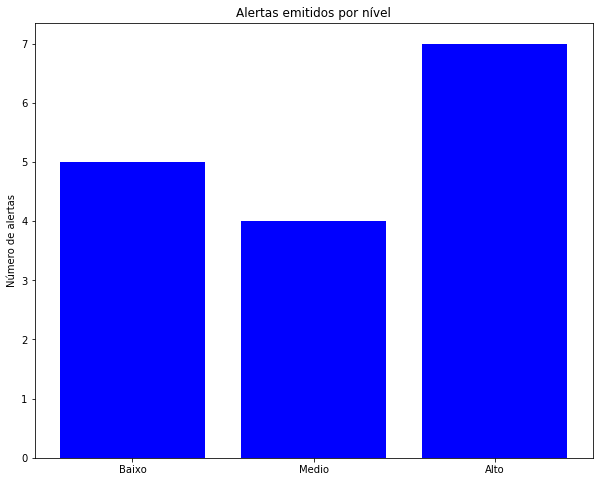

In [136]:
import datetime

alerta_baixo = 0
alerta_medio = 0
alerta_alto = 0

for i in range(len(predict)):
    pred_max = np.amax(predict[i])
    
    horario_epoch = datetime.datetime.utcfromtimestamp(int(round(test2x.values[i][0]))).strftime('%H:%M')
    
    if pred_max >= 0.9:
        print("Normal -", pred_max, "-", horario_epoch)
        #pass
    elif pred_max >= 0.75:
        print("Baixo -", pred_max, "-", horario_epoch)
        alerta_baixo += 1 
    elif pred_max >= 0.6:
        print("Medio -", pred_max, "-", horario_epoch)
        alerta_medio += 1
    else:
        print("Alto -", pred_max, "-", horario_epoch)
        print(list(test2y.columns))
        print([round(elem,2) for elem in predict[i]])
        print()
        alerta_alto += 1

print()
print("Baixos: ", alerta_baixo)
print("Medios: ", alerta_medio)
print("Altos: ", alerta_alto)

niveis = ("Baixo", "Medio", "Alto")
y_pos = np.arange(len(niveis))
count = [alerta_baixo, alerta_medio, alerta_alto]

plt.figure(figsize=(10,8))
plt.bar(y_pos, count, align='center', color='b')
plt.xticks(y_pos, niveis) 
plt.ylabel('Número de alertas')
plt.title('Alertas emitidos por nível')

[0.    0.    0.534 0.466 0.   ]
[0 1 4 3 2]
Index(['atv_Acordar (dia util)', 'atv_Acordar (fds)', 'atv_Indo dormir',
       'atv_Pres cozinha', 'atv_Pres sala'],
      dtype='object')


Text(0.5, 0, '% de pertencimento')

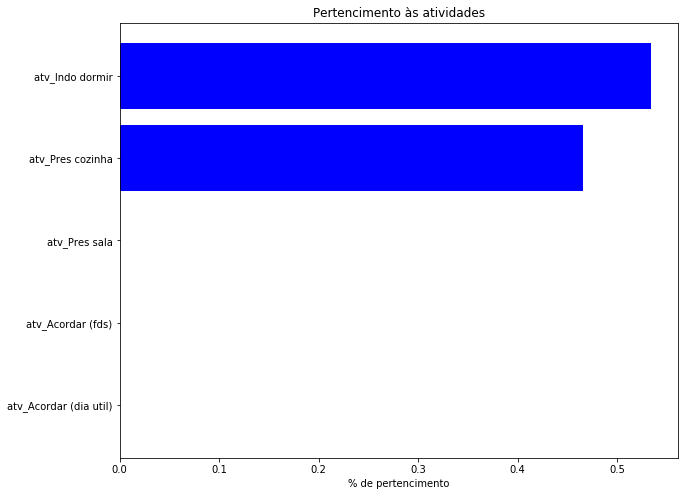

In [137]:
databar = predict[7]
idx_databar = np.argsort(databar)
ftr_databar = train_y.columns

print(databar)
print(idx_databar)
print(ftr_databar)

plt.figure(figsize=(10,8))
plt.title('Pertencimento às atividades')
plt.barh(range(len(idx_databar)), databar[idx_databar], color='b', align='center')
plt.yticks(range(len(idx_databar)), ftr_databar[idx_databar])
plt.xlabel('% de pertencimento')

[0.08614362 0.00539694 0.00094756 0.00888047 0.00878785 0.00963031
 0.01166448 0.35337709 0.51517168]
[2 1 4 3 5 6 0 7 8]
Index(['Horario', 'Fim de Semana', 'lig_desl_luz', 'lig_desl_aparelho',
       'tempo_lig_luz', 'tempo_lig_aparelho', 'cmd_Corredor', 'cmd_Cozinha',
       'cmd_Sala'],
      dtype='object')


Text(0.5, 0, 'Relative Importance')

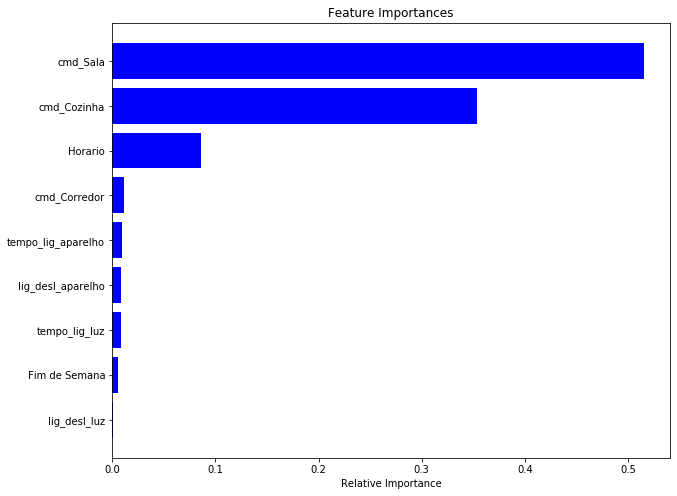

In [138]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)
features = train_x.columns

print(importances)
print(indices)
print(features)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [139]:
"""
from sklearn.tree import export_graphviz
import pydotplus

estimator = clf_rf.estimators_[1]

dot_data = export_graphviz(estimator, 
                #out_file='tree.dot', 
                feature_names = train_x.columns,
                class_names = train_y.columns,
                rounded = True, #proportion = False, 
                #precision = 2,
                filled = True)

# Draw graph
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)  

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Show graph
#Image(graph.create_png())
graph.write_png("RF_tree.png")
"""

'\nfrom sklearn.tree import export_graphviz\nimport pydotplus\n\nestimator = clf_rf.estimators_[1]\n\ndot_data = export_graphviz(estimator, \n                #out_file=\'tree.dot\', \n                feature_names = train_x.columns,\n                class_names = train_y.columns,\n                rounded = True, #proportion = False, \n                #precision = 2,\n                filled = True)\n\n# Draw graph\ngraph = pydotplus.graphviz.graph_from_dot_data(dot_data)  \n\nimport os\nos.environ["PATH"] += os.pathsep + \'C:/Program Files (x86)/Graphviz2.38/bin/\'\n\n# Show graph\n#Image(graph.create_png())\ngraph.write_png("RF_tree.png")\n'